<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load-the-segmentation-data" data-toc-modified-id="Load-the-segmentation-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the segmentation data</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Manipulation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Segmentation" data-toc-modified-id="Data-Segmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Segmentation</a></span><ul class="toc-item"><li><span><a href="#Load-pickled-model" data-toc-modified-id="Load-pickled-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Load pickled model</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Standardization</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#KMeans-PCA" data-toc-modified-id="KMeans-PCA-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>KMeans PCA</a></span></li></ul></li><li><span><a href="#Descriptive-Anlysis-by-Segments" data-toc-modified-id="Descriptive-Anlysis-by-Segments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Descriptive Anlysis by Segments</a></span><ul class="toc-item"><li><span><a href="#Analysis-by-Customer" data-toc-modified-id="Analysis-by-Customer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Analysis by Customer</a></span></li><li><span><a href="#Segment-Proportions" data-toc-modified-id="Segment-Proportions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Segment Proportions</a></span><ul class="toc-item"><li><span><a href="#WARNING:-Seaborn-and-groupby-plot-gives-different-yerr" data-toc-modified-id="WARNING:-Seaborn-and-groupby-plot-gives-different-yerr-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>WARNING: Seaborn and groupby plot gives different yerr</a></span></li></ul></li><li><span><a href="#Brand-Choice" data-toc-modified-id="Brand-Choice-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Brand Choice</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li></ul></div>

# Description
Course: [Customer Analytics in Python by 365datascience.com](https://365datascience.teachable.com/courses/enrolled/709679)


**Data**
- segmentation data.csv
- purchase data

Segmentation data  
- came from grocery area in an area.
- id, sex, marital status, age, etc.
- each row is a customer
- 2k individuals
- purchasing behaviors of FMCG store collected using loyalty card.
- data was already preprocessed and nans are removed.

Purchase data
- each row is transaction not customer
- id, day, incidence, brand of chocolate
- 500 customers for 2 years

**Question**
- will a customer buy a product?
- which brand he will buy?
- how many items he will buy?

In [13]:
%load_ext autoreload

In [14]:
%autoreload 2

In [15]:
# my personal library
from bhishan import bp

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100
# np.random.seed(SEED)

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.1'), ('pandas', '1.0.1'), ('seaborn', '0.9.0')]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [18]:
import pickle

# Load the segmentation data

In [7]:
dfp = pd.read_csv('../data/purchase data.csv')
print(dfp.shape)

dfp.head().append(dfp.tail())

(58693, 24)


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0
58692,200000500,726,0,0,0,2,1,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [8]:
"""
3 question:
incidence: did the customer buy?
brand: which brand?
quantity: how many?

""";

# Data Manipulation

In [10]:
dfp.isnull().sum().sum()

0

# EDA

In [11]:
dfp.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [19]:
bp.plot_corr_style(dfp)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.00,0.00,0.05,0.02,0.09,0.02,0.05,0.00,0.00,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.12,0.12,0.06,0.10,0.07,-0.02,0.01
Day,0.00,1.00,0.03,0.01,0.03,0.02,0.04,-0.09,-0.06,0.78,0.57,0.39,-0.11,0.05,-0.00,-0.10,-0.10,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
Incidence,0.05,0.03,1.00,0.90,0.80,0.25,0.21,-0.05,-0.05,-0.00,-0.00,-0.00,0.03,0.04,0.00,0.02,0.03,-0.03,-0.01,0.07,0.04,0.07,0.06,0.10
Brand,0.02,0.01,0.90,1.00,0.67,0.33,0.24,-0.03,-0.02,-0.02,-0.02,-0.02,0.03,0.02,-0.01,0.02,0.05,-0.07,-0.02,0.12,0.07,0.13,0.13,0.20
Quantity,0.09,0.03,0.80,0.67,1.00,0.18,0.17,-0.05,-0.06,0.00,-0.00,-0.00,0.04,0.04,0.01,0.02,0.02,-0.00,0.01,0.06,0.05,0.06,0.04,0.07
Last_Inc_Brand,0.02,0.02,0.25,0.33,0.18,1.00,0.90,-0.03,0.00,-0.00,0.02,-0.03,0.02,0.00,-0.02,-0.01,0.01,-0.07,-0.02,0.12,0.07,0.13,0.13,0.20
Last_Inc_Quantity,0.05,0.04,0.21,0.24,0.17,0.90,1.00,-0.04,-0.00,0.01,0.03,-0.01,0.04,0.00,-0.01,-0.01,0.00,-0.03,-0.01,0.07,0.04,0.07,0.06,0.10
Price_1,0.00,-0.09,-0.05,-0.03,-0.05,-0.03,-0.04,1.00,0.11,-0.00,-0.16,0.06,-0.47,-0.14,-0.08,0.05,-0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00
Price_2,0.00,-0.06,-0.05,-0.02,-0.06,0.00,-0.00,0.11,1.00,-0.01,-0.02,-0.03,-0.11,-0.50,-0.08,0.03,0.04,0.00,0.00,-0.00,0.00,0.00,0.01,0.01
Price_3,0.00,0.78,-0.00,-0.02,0.00,-0.00,0.01,-0.00,-0.01,1.00,0.45,0.23,-0.19,0.04,-0.10,-0.10,-0.06,0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01


In [20]:
dfp.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


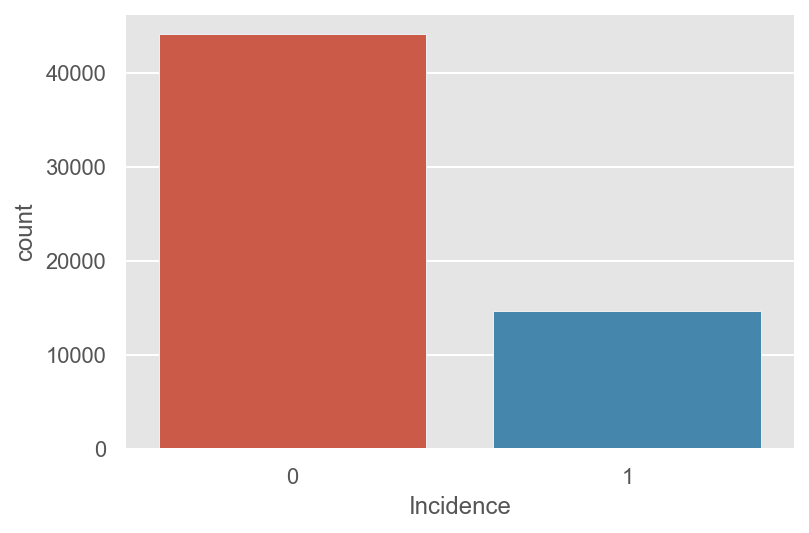

In [27]:
sns.countplot(dfp['Incidence'])

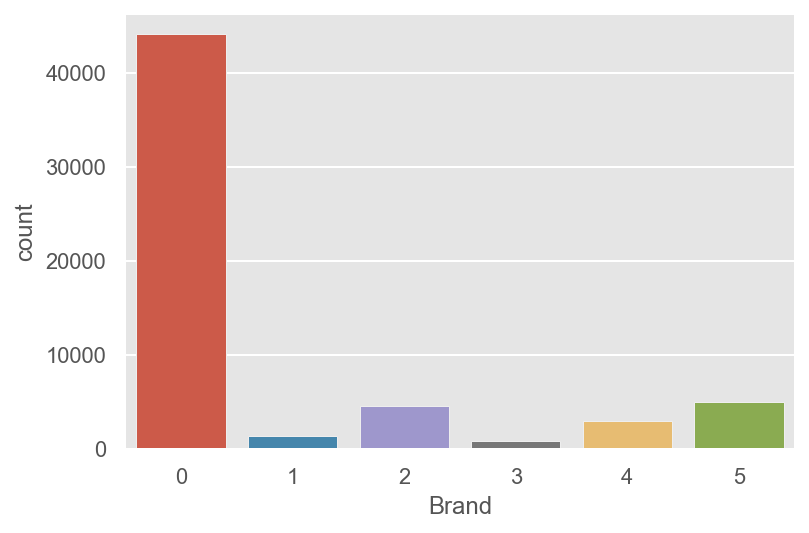

In [28]:
sns.countplot(dfp['Brand'])

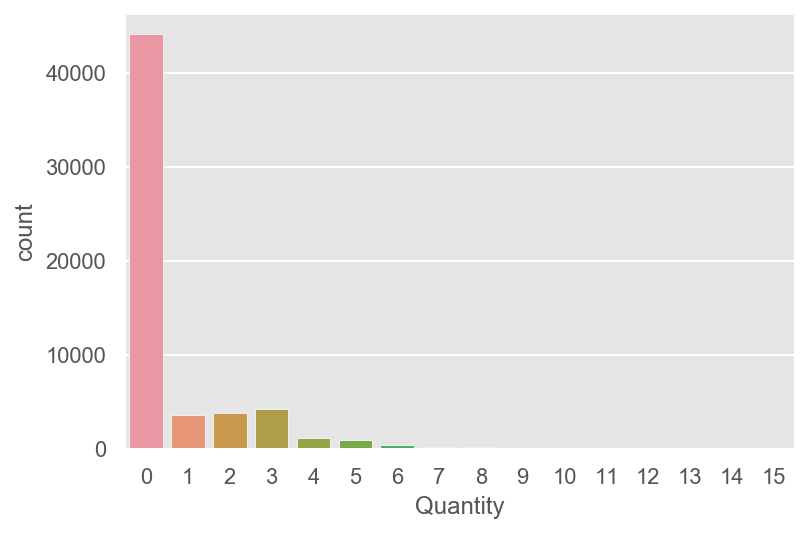

In [26]:
sns.countplot(dfp['Quantity'])

# Data Segmentation

## Load pickled model

In [30]:
scaler = pickle.load(open('models/scaler.pickle', 'rb'))
pca = pickle.load(open('models/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('models/kmeans_pca.pickle', 'rb'))

## Standardization

In [32]:
dfp.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [33]:
dfp.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [36]:
df_selected = dfp[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

df_purchase_segm_std = scaler.transform(df_selected)

## PCA

In [37]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## KMeans PCA

In [38]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [40]:
df_purchase_predictors = dfp.copy()

In [41]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

# Descriptive Anlysis by Segments

## Analysis by Customer

In [42]:
df_purchase_predictors.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [43]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [56]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [57]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [58]:
# We obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
temp4.head(2)

,Segment
ID,
200000001,0
200000002,2


In [59]:
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,2
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


In [64]:
(pd.crosstab(df_purchase_predictors['ID'],
           df_purchase_predictors['Incidence'],
           margins=True,margins_name='N_Visits')
.rename(columns={1:'N_Purchases'})
.drop(0,axis=1)
.assign(
    Average_N_Purchases = lambda x: 
    x['N_Purchases'].div(x['N_Visits'])
)

.head()
)

Incidence,N_Purchases,N_Visits,Average_N_Purchases
ID,,,
200000001,9,101,0.089109
200000002,11,87,0.126437
200000003,10,97,0.103093
200000004,11,85,0.129412
200000005,13,111,0.117117


In [78]:
mapping_components = {0:'Standard',
                      1:'Career-Focused',
                      2:'Fewer-Opportunities',
                      3:'Well-Off'}

df_purchase_descr['SegmentName'] = df_purchase_descr['Segment'].map(mapping_components)

df_purchase_descr.head(2)

,N_Visits,N_Purchases,Average_N_Purchases,Segment,SegmentName
ID,,,,,
200000001,101,9,0.089109,0,Standard
200000002,87,11,0.126437,2,Fewer-Opportunities


## Segment Proportions

In [68]:
df_purchase_descr['Segment'].value_counts(normalize=True)

0    0.406
1    0.210
2    0.196
3    0.188
Name: Segment, dtype: float64

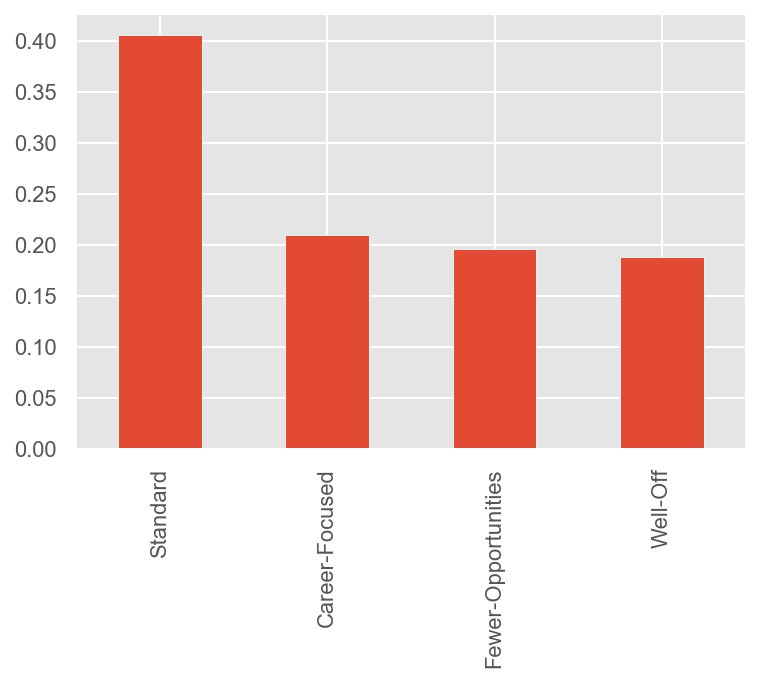

In [79]:
df_purchase_descr['SegmentName'].value_counts(normalize=True).plot.bar()

In [72]:
df_purchase_descr.shape

(500, 4)

In [73]:
df_purchase_descr.head(2)

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,2


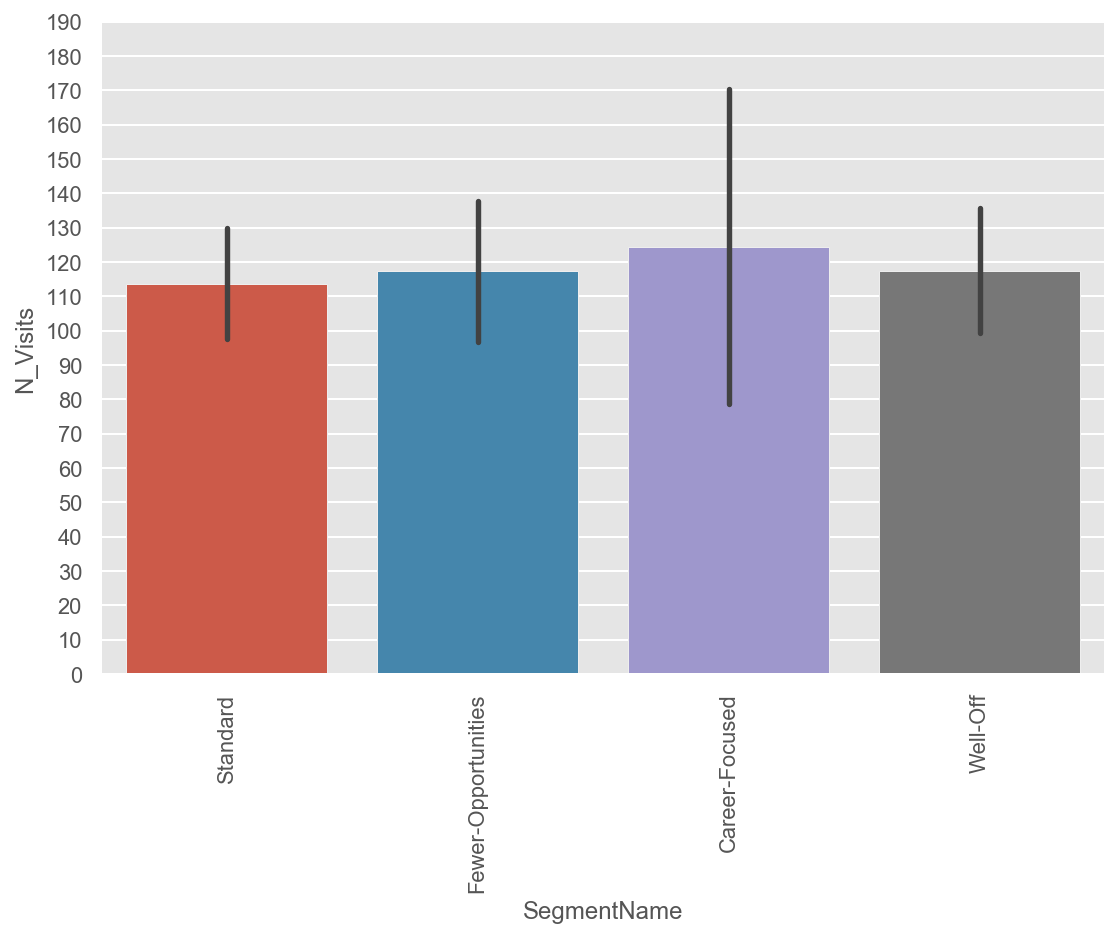

In [119]:
plt.figure(figsize = (9, 6))
sns.barplot(x='SegmentName',y='N_Visits',
            data=df_purchase_descr,
            ci='sd',
            estimator=np.mean,)
plt.xticks(rotation=90)
plt.yticks(range(0,200,10))
plt.show()

# err estimators are WRONG in seaborn.

In [91]:
df_purchase_descr.groupby('SegmentName')['N_Visits'].mean()

SegmentName
Career-Focused         124.428571
Fewer-Opportunities    117.295918
Standard               113.719212
Well-Off               117.531915
Name: N_Visits, dtype: float64

In [117]:
df_purchase_descr.head(2)

,N_Visits,N_Purchases,Average_N_Purchases,Segment,SegmentName
ID,,,,,
200000001,101,9,0.089109,0,Standard
200000002,87,11,0.126437,2,Fewer-Opportunities


In [89]:
# We calculate the mean by the four segments. It will help us determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,113.719212,22.768473,0.201751
1,124.428571,41.847619,0.294155
2,117.295918,34.602041,0.284478
3,117.531915,23.734043,0.205481


In [92]:
# We calculate the standard deviation by segments. It will help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

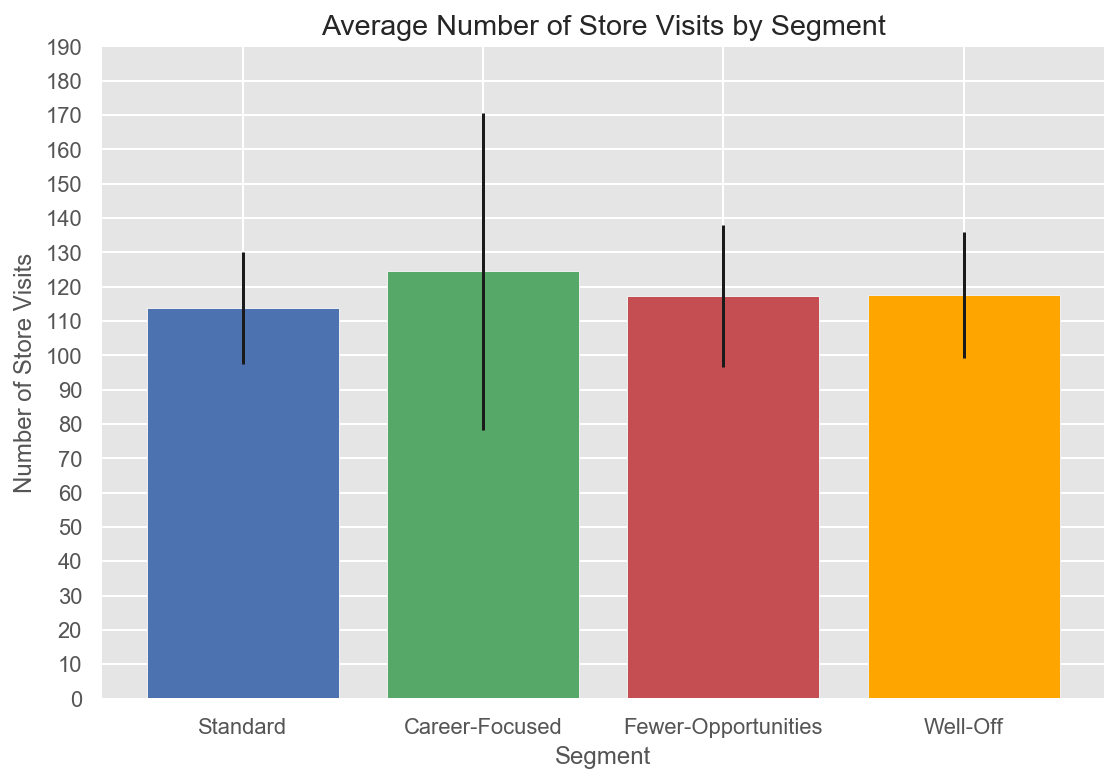

In [120]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')
plt.yticks(range(0,200,10));

### WARNING: Seaborn and groupby plot gives different yerr

- seaborn parametr ci uses bootstrap sample, use 'sd' to get std.

Text(0.5, 1.0, 'Number of Purchases by Segment')

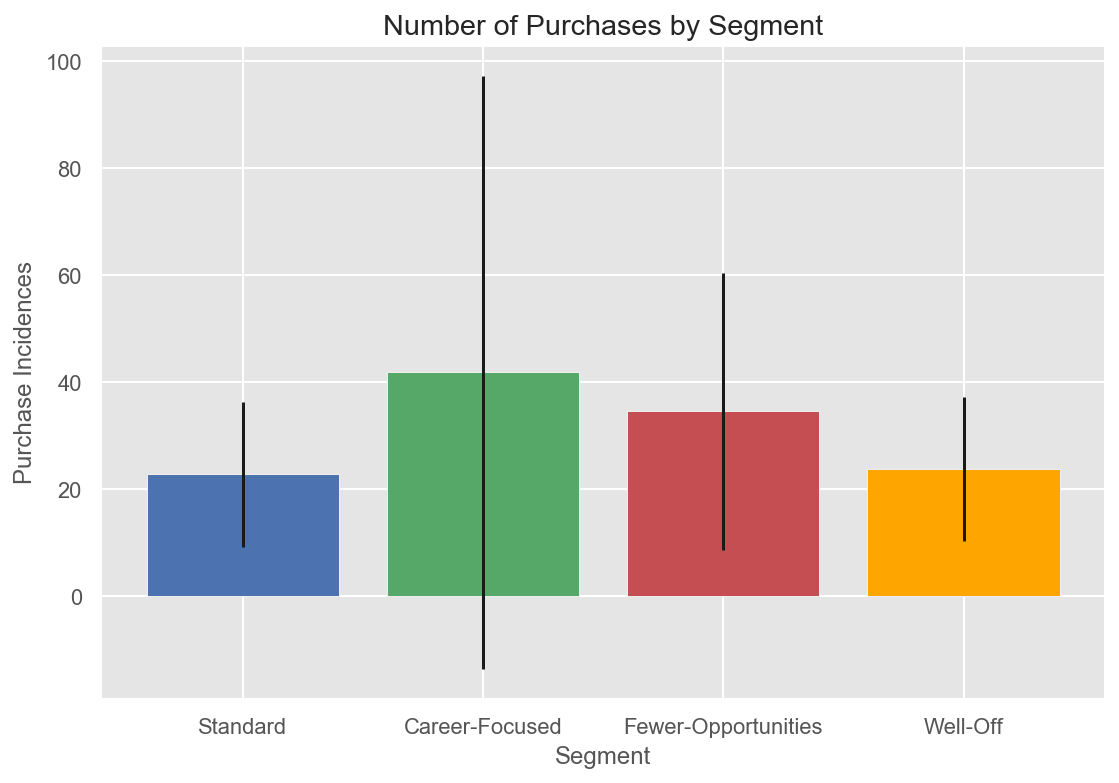

In [94]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

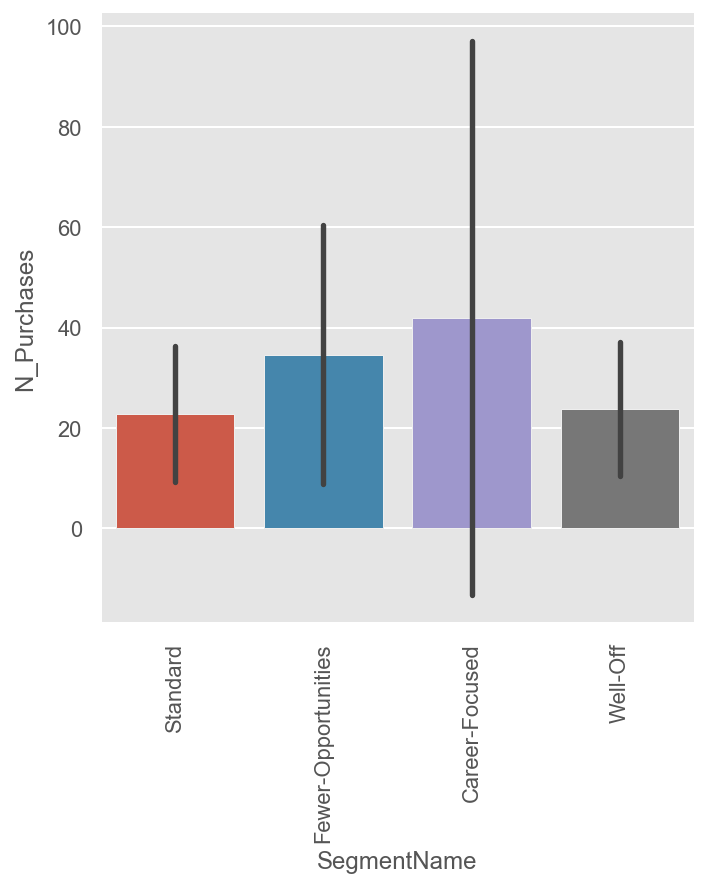

In [130]:
sns.catplot(x='SegmentName',y='N_Purchases',data=df_purchase_descr,
           ci='sd',kind='bar')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

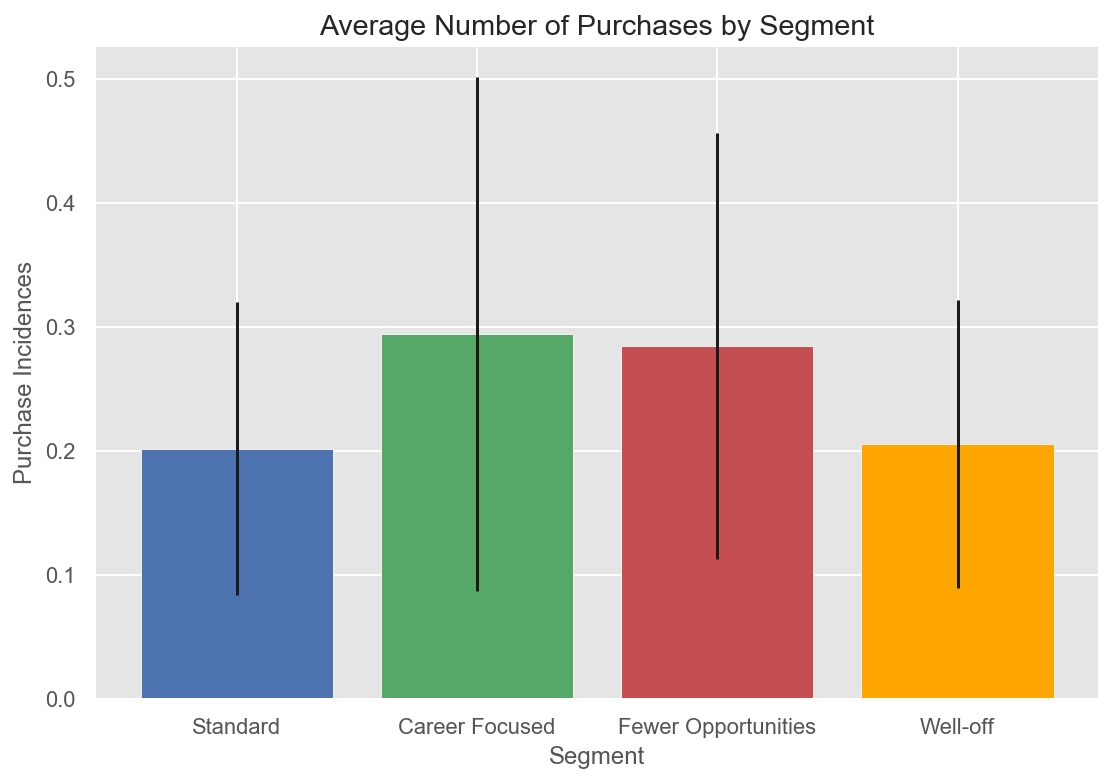

In [95]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

## Brand Choice

In [98]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [101]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')

brand_dummies['Segment'] = df_purchase_incidence['Segment']
brand_dummies['ID'] = df_purchase_incidence['ID']


brand_dummies.head(2)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001


In [102]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [103]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

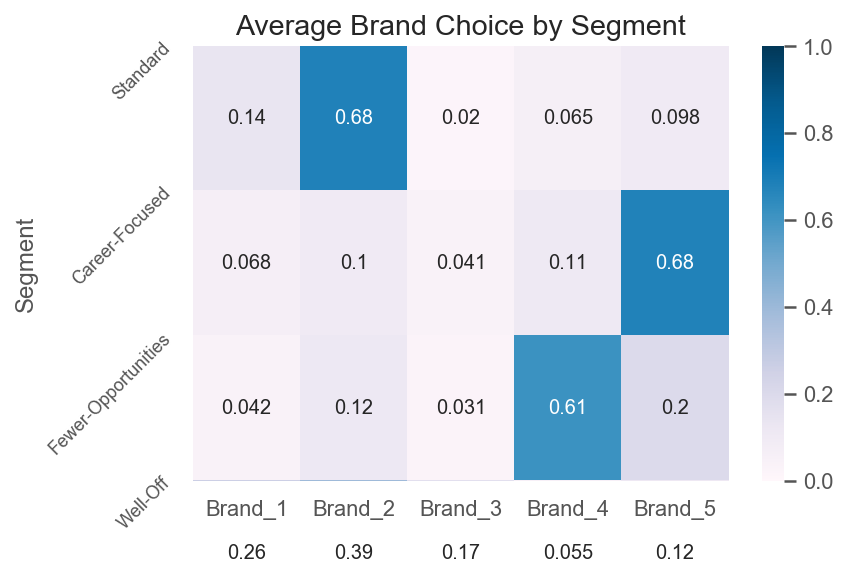

In [104]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

## Revenue

In [105]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2409.39
1,1,664.94
2,2,699.47
3,3,2531.85


In [106]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

In [107]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [108]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [109]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [110]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2409.39,15177.84,730.68,1924.09,2380.59,22622.59
1,1,664.94,1144.38,650.32,2301.70,20251.43,25012.77
2,2,699.47,1298.23,731.35,14185.57,5509.69,22424.31
3,3,2531.85,4147.86,3909.17,628.74,1479.29,12696.91


In [111]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2409.39,15177.84,730.68,1924.09,2380.59,22622.59,0.406
Career-Focused,664.94,1144.38,650.32,2301.70,20251.43,25012.77,0.210
Fewer-Opportunities,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Well-Off,2531.85,4147.86,3909.17,628.74,1479.29,12696.91,0.188
